In [1]:
import pandas as pd
df = pd.read_stata("data/close_college.dta")
display(df.head())
print(len(df))

,nearc4,educ,black,smsa,south,married,exper,lwage
0,0,7,1,1,0,1.0,16,6.306275
1,0,12,0,1,0,1.0,9,6.175867
2,0,12,0,1,0,1.0,16,6.580639
3,1,11,0,1,0,1.0,10,5.521461
4,1,12,0,1,0,1.0,16,6.591674


3010


In [2]:
# Import packages
from itertools import permutations

import conditional_independence
import hyppo
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pingouin as pg
import itertools


np.random.seed(0)

c:\Users\femke\anaconda3\envs\causal_data_science_env\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


#### Relation educ and lwage

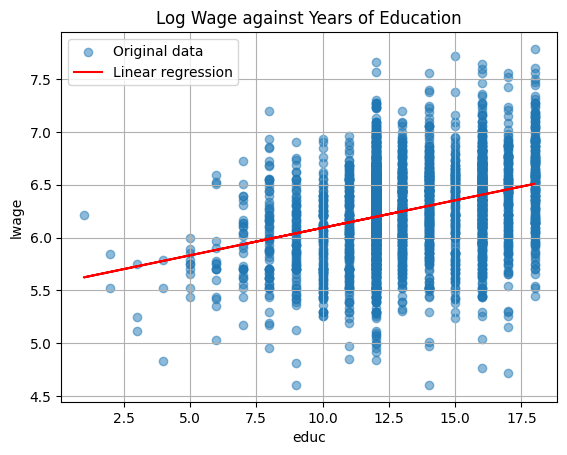

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame containing the lwage and educ columns
X = df[['educ']]
y = df['lwage']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values based on the model
y_pred = model.predict(X)

# Plot original data points
plt.scatter(df['educ'], df['lwage'], alpha=0.5, label='Original data')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Linear regression')

# Set labels and title
plt.title('Log Wage against Years of Education')
plt.xlabel('educ')
plt.ylabel('lwage')
plt.legend()
plt.grid(True)
plt.show()

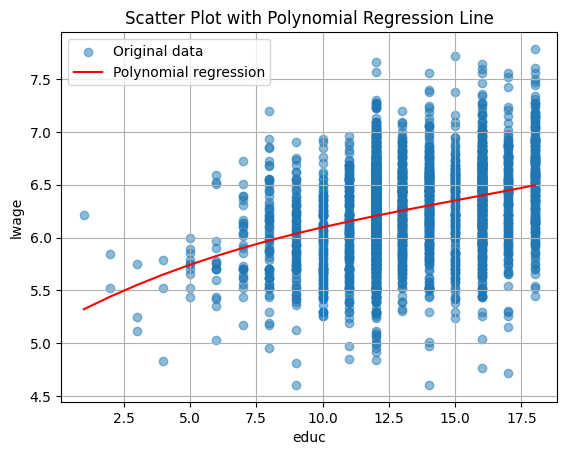

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Assuming df is your DataFrame containing the lwage and educ columns
X = df[['educ']]
y = df['lwage']

# Fit polynomial regression model
poly = PolynomialFeatures(degree=3)  # You can adjust the degree of the polynomial
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Predict y values based on the model
y_pred = model.predict(X_poly)

# Sort X values for smoother plotting
X_sorted_index = np.argsort(X.values.flatten())
X_sorted = X.values[X_sorted_index]
y_pred_sorted = y_pred[X_sorted_index]

# Plot original data points
plt.scatter(df['educ'], df['lwage'], alpha=0.5, label='Original data')

# Plot the polynomial regression line
plt.plot(X_sorted, y_pred_sorted, color='red', label='Polynomial regression')

# Set labels and title
plt.title('Scatter Plot with Polynomial Regression Line')
plt.xlabel('educ')
plt.ylabel('lwage')
plt.legend()
plt.grid(True)
plt.show()


### Married Column
There are 7 missing values.
All values are 1 or above, meaning there are no people that are not married.

In [9]:
print(set(df['married']))

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, nan, nan, nan, nan, nan, nan}


In [10]:
from collections import Counter
print(Counter(df['married']))

Counter({1.0: 2144, 6.0: 585, 4.0: 155, 5.0: 102, 2.0: 14, 3.0: 3, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1, nan: 1})


### Descriptive statistics

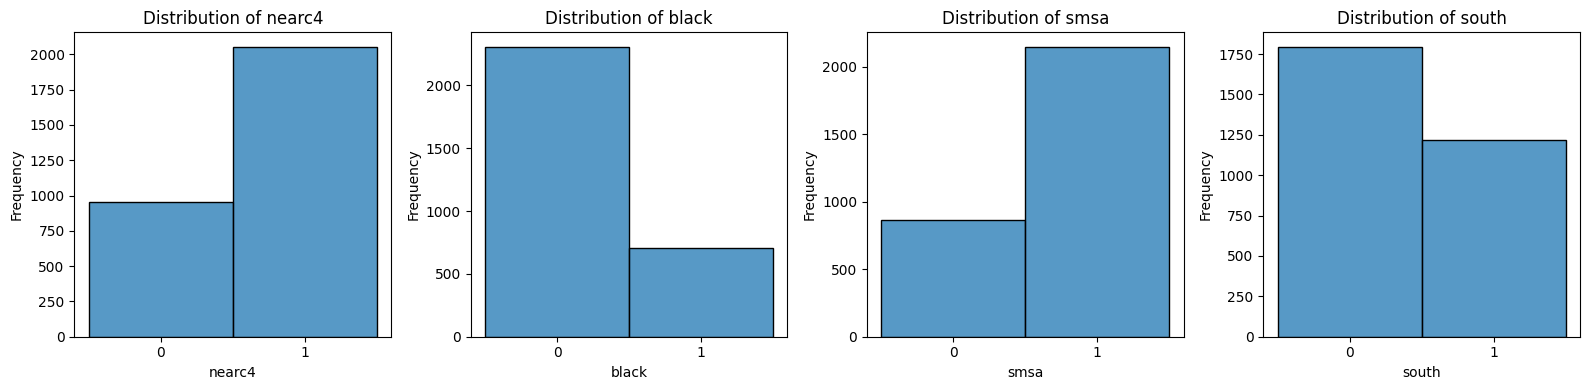

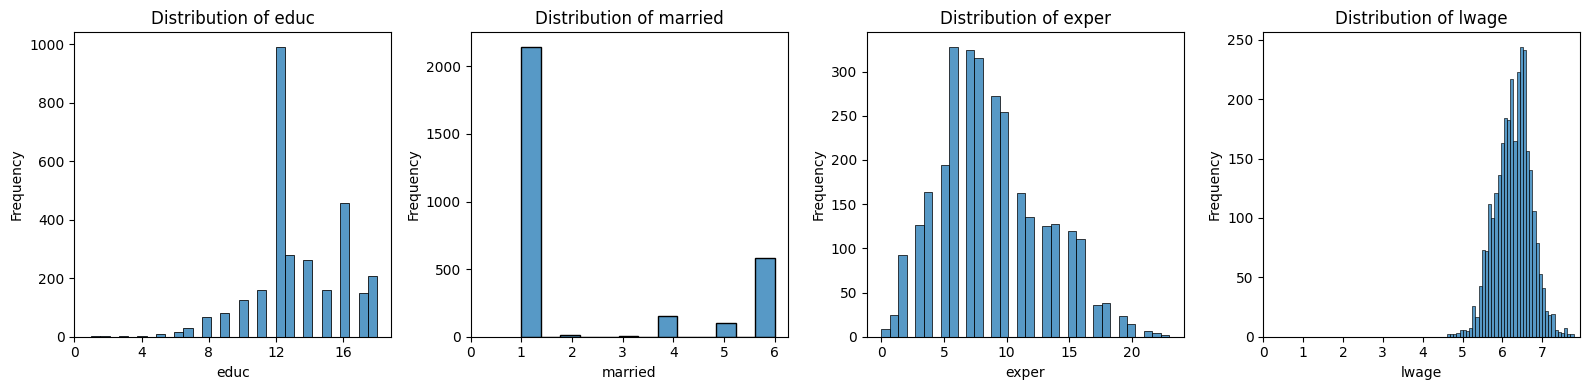

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing binary variables (0 or 1)
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

# Setting up the figure and axes for subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Looping through binary columns and plotting histograms
for i, col in enumerate(binary_cols):
    sns.histplot(data=df[col], ax=axes[i], bins=[0, 1, 2], discrete=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_xticks([0, 1])  # Set x-axis ticks to only show 0 and 1

# Remove any unused subplots
for i in range(len(binary_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

non_binary_cols = [col for col in df.columns if col not in binary_cols]

# Setting up the figure and axes for subplots
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Looping through numerical columns and plotting histograms
for i, col in enumerate(non_binary_cols):
    sns.histplot(data=df[col], ax=axes[i], kde=False)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    max_value = int(df[col].max())
    
    # Set x-axis ticks with 5 steps
    axes[i].set_xticks(range(0, max_value + 1, max_value // 4))



plt.tight_layout()
plt.show()



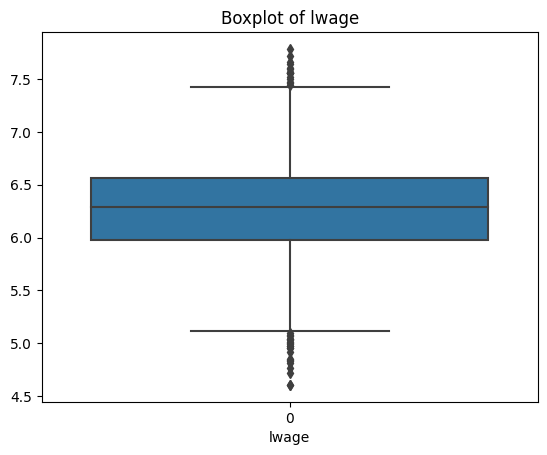

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'lwage' column
sns.boxplot(data=df['lwage'])
plt.title('Boxplot of lwage')
plt.xlabel('lwage')
plt.show()


In [5]:
import pandas as pd

# Create an empty DataFrame to store statistics
statistics_df = pd.DataFrame()

# Iterate through columns in the original DataFrame
for col in df.columns:
    # Calculate statistics for each column and append to statistics_df
    stats = df[col].describe()
    statistics_df[col] = stats

# Transpose the DataFrame so that columns become rows
statistics_df = statistics_df.T
statistics_df['missing_values'] = df.isnull().sum().values

# Print the statistics DataFrame
display(statistics_df)

# Create an empty DataFrame to store statistics
statistics_df = pd.DataFrame()

# Iterate through columns in the original DataFrame
for col in non_binary_cols:
    # Calculate statistics for each column and append to statistics_df
    stats = df[col].describe()
    statistics_df[col] = stats

# Transpose the DataFrame so that columns become rows
statistics_df = statistics_df.T
statistics_df['missing_values'] = df.loc[:, non_binary_cols].isnull().sum().values

# Print the statistics DataFrame
display(statistics_df)


,count,mean,std,min,25%,50%,75%,max,missing_values
nearc4,3010.0,0.682060,0.465753,0.00000,0.000000,1.000000,1.000000,1.000000,0
educ,3010.0,13.263455,2.676913,1.00000,12.000000,13.000000,16.000000,18.000000,0
black,3010.0,0.233555,0.423162,0.00000,0.000000,0.000000,0.000000,1.000000,0
smsa,3010.0,0.712957,0.452457,0.00000,0.000000,1.000000,1.000000,1.000000,0
south,3010.0,0.403654,0.490711,0.00000,0.000000,0.000000,1.000000,1.000000,0
married,3003.0,2.271395,2.066823,1.00000,1.000000,1.000000,4.000000,6.000000,7
exper,3010.0,8.856146,4.141672,0.00000,6.000000,8.000000,11.000000,23.000000,0
lwage,3010.0,6.261832,0.443798,4.60517,5.976985,6.286928,6.563503,7.784889,0


,count,mean,std,min,25%,50%,75%,max,missing_values
educ,3010.0,13.263455,2.676913,1.00000,12.000000,13.000000,16.000000,18.000000,0
married,3003.0,2.271395,2.066823,1.00000,1.000000,1.000000,4.000000,6.000000,7
exper,3010.0,8.856146,4.141672,0.00000,6.000000,8.000000,11.000000,23.000000,0
lwage,3010.0,6.261832,0.443798,4.60517,5.976985,6.286928,6.563503,7.784889,0


### Correlations

In [6]:
correlation_matrix = df.corr()
print(correlation_matrix)



           nearc4      educ     black      smsa     south   married     exper  \
nearc4   1.000000  0.144240 -0.075017  0.353731 -0.222046  0.016058 -0.061621   
educ     0.144240  1.000000 -0.269388  0.187579 -0.201411  0.070970 -0.652956   
black   -0.075017 -0.269388  1.000000 -0.036813  0.341267  0.108788  0.139209   
smsa     0.353731  0.187579 -0.036813  1.000000 -0.184474  0.082909 -0.135722   
south   -0.222046 -0.201411  0.341267 -0.184474  1.000000 -0.003022  0.111650   
married  0.016058  0.070970  0.108788  0.082909 -0.003022  1.000000 -0.218000   
exper   -0.061621 -0.652956  0.139209 -0.135722  0.111650 -0.218000  1.000000   
lwage    0.163621  0.314224 -0.303206  0.234600 -0.283630 -0.208023  0.012484   

            lwage  
nearc4   0.163621  
educ     0.314224  
black   -0.303206  
smsa     0.234600  
south   -0.283630  
married -0.208023  
exper    0.012484  
lwage    1.000000  


In [7]:

correlation_pairs = correlation_matrix.unstack().sort_values()
correlation_pairs = correlation_pairs[correlation_pairs != 1].drop_duplicates()
print(correlation_pairs)



exper    educ      -0.652956
black    lwage     -0.303206
south    lwage     -0.283630
black    educ      -0.269388
nearc4   south     -0.222046
exper    married   -0.218000
married  lwage     -0.208023
south    educ      -0.201411
         smsa      -0.184474
smsa     exper     -0.135722
black    nearc4    -0.075017
exper    nearc4    -0.061621
black    smsa      -0.036813
married  south     -0.003022
lwage    exper      0.012484
nearc4   married    0.016058
educ     married    0.070970
married  smsa       0.082909
         black      0.108788
exper    south      0.111650
black    exper      0.139209
educ     nearc4     0.144240
nearc4   lwage      0.163621
smsa     educ       0.187579
         lwage      0.234600
educ     lwage      0.314224
south    black      0.341267
smsa     nearc4     0.353731
dtype: float64


In [8]:
from scipy.stats import pearsonr

df.dropna(inplace=True)

correlation_results = pd.DataFrame(index=df.columns, columns=df.columns)

for col1 in df.columns:
    for col2 in df.columns:
        # Calculate Pearson correlation coefficient and p-value
        corr_coef, p_value = pearsonr(df[col1], df[col2])
        
        # Store the results in the correlation_results DataFrame
        correlation_results.at[col1, col2] = (corr_coef, p_value)

# Print correlation results
print("Correlation results:")
print(correlation_results)

Correlation results:
                                                nearc4  \
nearc4                                      (1.0, 0.0)   
educ       (0.1440003638910638, 2.204910710792541e-15)   
black    (-0.0751989697053816, 3.7073175677394373e-05)   
smsa       (0.3529741524097666, 7.985801097230718e-89)   
south    (-0.22235698142861277, 5.888085192452197e-35)   
married     (0.016057906852809372, 0.3790447220900738)   
exper     (-0.06319976330612696, 0.000529548639326439)   
lwage     (0.16197180740790174, 4.208986024793501e-19)   

                                                  educ  \
nearc4     (0.1440003638910638, 2.204910710792541e-15)   
educ                                        (1.0, 0.0)   
black    (-0.2676542885273877, 1.9640833794841494e-50)   
smsa      (0.1879892519231429, 2.7472431270802976e-25)   
south    (-0.2008329552952703, 1.0674991220867654e-28)   
married    (0.0709696659384507, 9.925692519593855e-05)   
exper                       (-0.6534668098323658, 

In [9]:
import pandas as pd
from scipy.stats import pearsonr

# Sample DataFrame with missing values

# Drop rows with NaN values
df2 = df.dropna()

# Initialize an empty DataFrame to store correlation results
correlation_results = pd.DataFrame(index=df2.columns, columns=df2.columns)

# Iterate through each pair of columns
for col1 in df2.columns:
    for col2 in df2.columns:
        # Calculate Pearson correlation coefficient and p-value
        corr_coef, p_value = pearsonr(df2[col1], df2[col2])
        
        # Store the results in the correlation_results DataFrame
        correlation_results.at[col1, col2] = (corr_coef, p_value)

# Print correlation results
print("Correlation results:")
print(correlation_results)


Correlation results:
                                                nearc4  \
nearc4                                      (1.0, 0.0)   
educ       (0.1440003638910638, 2.204910710792541e-15)   
black    (-0.0751989697053816, 3.7073175677394373e-05)   
smsa       (0.3529741524097666, 7.985801097230718e-89)   
south    (-0.22235698142861277, 5.888085192452197e-35)   
married     (0.016057906852809372, 0.3790447220900738)   
exper     (-0.06319976330612696, 0.000529548639326439)   
lwage     (0.16197180740790174, 4.208986024793501e-19)   

                                                  educ  \
nearc4     (0.1440003638910638, 2.204910710792541e-15)   
educ                                        (1.0, 0.0)   
black    (-0.2676542885273877, 1.9640833794841494e-50)   
smsa      (0.1879892519231429, 2.7472431270802976e-25)   
south    (-0.2008329552952703, 1.0674991220867654e-28)   
married    (0.0709696659384507, 9.925692519593855e-05)   
exper                       (-0.6534668098323658, 

In [10]:
correlation_df = pd.DataFrame(correlation_results)

sorted_correlation_results = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])


In [11]:
correlation_df = pd.DataFrame(correlation_results)

sorted_correlation_results = pd.DataFrame(columns=['Variable 1', 'Variable 2', 'Correlation', 'P-value'])

for variable1 in correlation_df.columns:
    for variable2 in correlation_df.index:
        if variable1 != variable2:  # Exclude rows where Variable 1 is equal to Variable 2
            correlation, p_value = correlation_df.at[variable2, variable1]
            sorted_correlation_results = sorted_correlation_results.append({
                'Variable 1': variable1,
                'Variable 2': variable2,
                'Correlation': correlation,
                'P-value': p_value
            }, ignore_index=True)

# Sort the DataFrame based on correlation coefficient absolute values
sorted_correlation_results['Correlation'] = sorted_correlation_results['Correlation']
sorted_correlation_results.sort_values(by='Correlation', ascending=False, inplace=True)


not_significant = sorted_correlation_results.loc[sorted_correlation_results['P-value']>0.05]
significant = sorted_correlation_results.loc[sorted_correlation_results['P-value']<=0.05]

C:\Users\femke\AppData\Local\Temp\ipykernel_11352\185926311.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_correlation_results = sorted_correlation_results.append({
C:\Users\femke\AppData\Local\Temp\ipykernel_11352\185926311.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_correlation_results = sorted_correlation_results.append({
C:\Users\femke\AppData\Local\Temp\ipykernel_11352\185926311.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sorted_correlation_results = sorted_correlation_results.append({
C:\Users\femke\AppData\Local\Temp\ipykernel_11352\185926311.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s

In [12]:
display(not_significant)

,Variable 1,Variable 2,Correlation,P-value
4,nearc4,married,0.016058,0.379045
35,married,nearc4,0.016058,0.379045
48,exper,lwage,0.011985,0.511497
55,lwage,exper,0.011985,0.511497
32,south,married,-0.003022,0.868516
39,married,south,-0.003022,0.868516


In [13]:
display(significant)

,Variable 1,Variable 2,Correlation,P-value
2,nearc4,smsa,0.352974,7.985801e-89
21,smsa,nearc4,0.352974,7.985801e-89
30,south,black,0.341500,6.629909e-83
17,black,south,0.341500,6.629909e-83
50,lwage,educ,0.314531,6.022787e-70
13,educ,lwage,0.314531,6.022787e-70
27,smsa,lwage,0.235246,4.894693e-39
52,lwage,smsa,0.235246,4.894693e-39
9,educ,smsa,0.187989,2.747243e-25
22,smsa,educ,0.187989,2.747243e-25


### dependece tests

In [35]:
import pandas as pd
import pingouin as pg
from itertools import permutations

def test_all(df, vars=['X', 'Y', 'Z'], max_conditions=None):
    results = []
    if max_conditions is None:
        max_conditions = len(vars) - 1  # Maximum number of conditions is the number of variables - 1

    # Marginal
    for var1, var2 in permutations(vars, 2):
        corr_result = pg.partial_corr(data=df, x=var1, y=var2, covar=[], method='pearson')
        corr_coef = corr_result['r'].item()
        p_val = corr_result['p-val'].item()
        confi_inter = corr_result['CI95%'].item()
        results.append([var1, var2, None, confi_inter, corr_coef, p_val])

    # Conditional
    for n_conditions in range(1, min(max_conditions + 1, len(vars))):
        for vars_combination in permutations(vars, n_conditions + 2):
            var1, var2, *conds = vars_combination
            corr_result = pg.partial_corr(data=df, x=var1, y=var2, covar=conds, method='pearson')
            corr_coef = corr_result['r'].item()
            p_val = corr_result['p-val'].item()
            confi_inter = corr_result['CI95%'].item()
            results.append([var1, var2, ', '.join(conds), confi_inter, corr_coef, p_val])

    # Create DataFrame from results
    columns = ['var1', 'var2', 'con', 'CI95%', 'correlation', 'p-value']
    results_df = pd.DataFrame(results, columns=columns)

    

    return results_df

def filter_out_dubble_conditions(df, columns_list):
    column_pairs = list(itertools.combinations(columns_list, 2))
    column_dict = {}
    for key, value in column_pairs:
        if key in column_dict:
            column_dict[key].append(value)
        else:
            column_dict[key] = [value]

    
    filtered_df = pd.DataFrame()
    for option in column_dict.keys():
        subdf = df.loc[(df['var1']==option) & (df['var2'].isin(column_dict[option]))]
        filtered_df = pd.concat([filtered_df, subdf])


    filtered_df['con'] = filtered_df['con'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

    conditions = filtered_df['con'].values

    single_conditions = []

    for i in conditions:
        if set(i) not in single_conditions:
            single_conditions.append(set(i))

    filtered_conditions = [list(i) for i in single_conditions]

    new_df = filtered_df.loc[filtered_df['con'].isin(filtered_conditions)]
    return new_df

In [36]:
# independence_tests = test_all(df, vars=df.columns, max_conditions=len(df.columns)-2)
# independence_tests.to_csv("data/not_filtered_independence_tests.csv", index=False)
# filtered_independence_tests = filter_out_dubble_conditions(independence_tests, df.columns)
# filtered_independence_tests.to_csv("data/independence_tests.csv", index=False)

In [37]:
import ast

def parse_list_string(string):
        return ast.literal_eval(string)

independence_tests = pd.read_csv('data/independence_tests.csv')
independence_tests['con'] = independence_tests['con'].apply(parse_list_string)
display(independence_tests.head())

,var1,var2,con,CI95%,correlation,p-value
0,nearc4,educ,[],[0.11 0.18],0.144000,2.204911e-15
1,nearc4,black,[],[-0.11 -0.04],-0.075199,3.707318e-05
2,nearc4,smsa,[],[0.32 0.38],0.352974,7.985801e-89
3,nearc4,south,[],[-0.26 -0.19],-0.222357,5.888085e-35
4,nearc4,married,[],[-0.02 0.05],0.016058,3.790447e-01


In [45]:
#### educ and lwage 
relation = independence_tests.loc[(independence_tests['var1']=='educ') & (independence_tests['var2']=='lwage')].sort_values(by=['correlation'],ascending=False)
display(relation.loc[relation['con'].apply(len) == 0])
display(relation.head(10))

relation_non_sig = relation.loc[relation['p-value']>0.05]
print(len(relation_non_sig))


display(independence_tests.loc[(independence_tests['var1']=='educ') & (independence_tests['var2']=='exper') & (independence_tests['con'].apply(len) == 0)].sort_values(by=['correlation'],ascending=False))
display(independence_tests.loc[(independence_tests['var1']=='exper') & (independence_tests['var2']=='lwage') & (independence_tests['con'].apply(len) == 0)].sort_values(by=['correlation'],ascending=False))



,var1,var2,con,CI95%,correlation,p-value
453,educ,lwage,[],[0.28 0.35],0.314531,6.022787e-70


,var1,var2,con,CI95%,correlation,p-value
489,educ,lwage,[exper],[0.4 0.45],0.425898,1.412133e-132
576,educ,lwage,"[married, exper]",[0.39 0.45],0.416779,1.937316e-126
577,educ,lwage,"[exper, nearc4]",[0.38 0.44],0.413041,5.385255e-124
579,educ,lwage,"[exper, smsa]",[0.38 0.44],0.409840,6.301697e-122
698,educ,lwage,"[exper, nearc4, smsa]",[0.37 0.43],0.404793,1.131437e-118
693,educ,lwage,"[married, nearc4, exper]",[0.37 0.43],0.403312,9.691551e-118
572,educ,lwage,"[south, exper]",[0.37 0.43],0.399460,2.250711e-115
695,educ,lwage,"[married, smsa, exper]",[0.37 0.43],0.398504,9.596469e-115
786,educ,lwage,"[married, nearc4, smsa, exper]",[0.36 0.42],0.393539,1.150002e-111
684,educ,lwage,"[south, nearc4, exper]",[0.36 0.42],0.392721,3.310923e-111


0


,var1,var2,con,CI95%,correlation,p-value
452,educ,exper,[],[-0.67 -0.63],-0.653467,0.0


,var1,var2,con,CI95%,correlation,p-value
1728,exper,lwage,[],[-0.02 0.05],0.011985,0.511497


In [113]:
display(independence_tests.loc[(independence_tests['var1']=='exper')].sort_values(by=['correlation'],ascending=False))
print(set(independence_tests.loc[(independence_tests['var1']=='exper')]['var2']))

,var1,var2,con,CI95%,correlation,p-value
1758,exper,lwage,"[smsa, educ, south]",[0.28 0.34],0.312922,3.791584e-69
1743,exper,lwage,"[smsa, educ]",[0.28 0.34],0.312010,9.312373e-69
1773,exper,lwage,"[smsa, nearc4, educ, south]",[0.28 0.34],0.311899,1.157795e-68
1774,exper,lwage,"[smsa, black, educ, south]",[0.28 0.34],0.310776,3.707760e-68
1757,exper,lwage,"[smsa, nearc4, educ]",[0.28 0.34],0.309748,1.018769e-67
...,...,...,...,...,...,...
1762,exper,lwage,"[married, nearc4, smsa]",[-0.04 0.03],-0.001745,9.238848e-01
1749,exper,lwage,"[married, south]",[-0.04 0.03],-0.002204,9.039309e-01
1748,exper,lwage,"[married, smsa]",[-0.04 0.03],-0.003404,8.521474e-01
1745,exper,lwage,"[married, nearc4]",[-0.06 0.01],-0.025016,1.706655e-01


{'lwage'}


In [29]:
filtered_df = pd.DataFrame()

for i in range(len(df.columns)):
    current_col = df.columns[i]
    rest_col = df.columns[i+1:]

    sub_df = independence_tests.loc[(independence_tests['var1']==current_col) & (independence_tests['var2']).isin(rest_col)]
    filtered_df = pd.concat([filtered_df, sub_df])

display(filtered_df)


,var1,var2,con,CI95%,correlation,p-value
0,nearc4,educ,None,"[0.11, 0.18]",0.144000,2.204911e-15
1,nearc4,black,None,"[-0.11, -0.04]",-0.075199,3.707318e-05
2,nearc4,smsa,None,"[0.32, 0.38]",0.352974,7.985801e-89
3,nearc4,south,None,"[-0.26, -0.19]",-0.222357,5.888085e-35
4,nearc4,married,None,"[-0.02, 0.05]",0.016058,3.790447e-01
...,...,...,...,...,...,...
104547,exper,lwage,"married, south, smsa, nearc4, black, educ","[0.24, 0.3]",0.270213,2.640236e-51
104548,exper,lwage,"married, south, smsa, educ, nearc4, black","[0.24, 0.3]",0.270213,2.640236e-51
104549,exper,lwage,"married, south, smsa, educ, black, nearc4","[0.24, 0.3]",0.270213,2.640236e-51
104550,exper,lwage,"married, south, smsa, black, nearc4, educ","[0.24, 0.3]",0.270213,2.640236e-51


In [21]:
set(1,2)==set(2,1)

TypeError: set expected at most 1 argument, got 2